# Section IV. Calculation of the LLE for the signals from the dataset.

In [2]:
!pip install nolds==0.5.2

In [6]:
!wget www.kasprowski.pl/datasets/chaos_dataset.zip
!unzip chaos_dataset.zip

--2025-01-08 11:21:58--  http://www.kasprowski.pl/datasets/chaos_dataset.zip
Resolving www.kasprowski.pl (www.kasprowski.pl)... 94.152.164.213
Connecting to www.kasprowski.pl (www.kasprowski.pl)|94.152.164.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2156725 (2.1M) [application/zip]
Saving to: ‘chaos_dataset.zip’

chaos_dataset.zip   100%[===================>]   2.06M  1.06MB/s    in 1.9s    

2025-01-08 11:22:00 (1.06 MB/s) - ‘chaos_dataset.zip’ saved [2156725/2156725]

Archive:  chaos_dataset.zip
  inflating: C0ModelHalvorsenA513/C0ModelHalvorsenA513-1.txt  
  inflating: C0ModelHalvorsenA513/C0ModelHalvorsenA513-10.txt  
  inflating: C0ModelHalvorsenA513/C0ModelHalvorsenA513-2.txt  
  inflating: C0ModelHalvorsenA513/C0ModelHalvorsenA513-3.txt  
  inflating: C0ModelHalvorsenA513/C0ModelHalvorsenA513-4.txt  
  inflating: C0ModelHalvorsenA513/C0ModelHalvorsenA513-5.txt  
  inflating: C0ModelHalvorsenA513/C0ModelHalvorsenA513-6.txt  
  inflating: C0ModelHa

In [3]:
import numpy as np
import pandas as pd
import nolds
import warnings
import json
from matplotlib import pyplot as plt

In [4]:
files = ['C0ModelHalvorsenA513',
'C0ModelLorenzA51',
'C0ModelRoslerA52',
'C0ModelRucklideA515',
'C0ModelUedaA45',
'C1LinearOscBooming01',
'C1LinearOscFading01',
'C1LinearOscFading02',
'C1LinearOscillator01',
'C1LinearOscillator02']

## Calculation of the Largest Lyapunov Exponent (LLE) for each signal

In [7]:
warnings.filterwarnings('ignore')
lle = {}
wrong_no = 0
print("type", "no", "LLE", sep="\t")
for file in files:
    lle[file] = []
    for n in range(1,11):
        df = pd.read_csv(f'{file}/{file}-{n}.txt',header=None,usecols=[0])
        data = df[df.columns[0]].values.tolist()
        v = nolds.lyap_r(data,emb_dim=3)
        er = ''
        if (file.startswith('C0') and v<0) or (file.startswith('C1') and v>0):
            wrong_no += 1
            er = '!'
        lle[file].append(v)
        print(file, n, v, er, sep="\t")
warnings.filterwarnings('default')
print("Number of wrong classifications: ",wrong_no)

type	no	LLE
C0ModelHalvorsenA513	1	0.06728329052798507	
C0ModelHalvorsenA513	2	0.06534014353878739	
C0ModelHalvorsenA513	3	0.06521197509762824	
C0ModelHalvorsenA513	4	0.0645595342060901	
C0ModelHalvorsenA513	5	0.06415677893297622	
C0ModelHalvorsenA513	6	0.059436963505127956	
C0ModelHalvorsenA513	7	0.0506409197884383	
C0ModelHalvorsenA513	8	0.0708308909844635	
C0ModelHalvorsenA513	9	0.06351337119152671	
C0ModelHalvorsenA513	10	0.057771410250611464	
C0ModelLorenzA51	1	0.11160697092239123	
C0ModelLorenzA51	2	0.10248116067141518	
C0ModelLorenzA51	3	0.10933635672904495	
C0ModelLorenzA51	4	0.11700789134081144	
C0ModelLorenzA51	5	0.11445754634398493	
C0ModelLorenzA51	6	0.11265661426700821	
C0ModelLorenzA51	7	0.1011100713919876	
C0ModelLorenzA51	8	0.1054022535394625	
C0ModelLorenzA51	9	0.10618824950958551	
C0ModelLorenzA51	10	0.10653971112648347	
C0ModelRoslerA52	1	0.028733503123871344	
C0ModelRoslerA52	2	0.024511687222279997	
C0ModelRoslerA52	3	0.025847958756568735	
C0ModelRoslerA52	4	0.02546

## Visualisation

Text(0.5, 1.0, 'Largest Lyapunov Exponent calculated for signals ')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


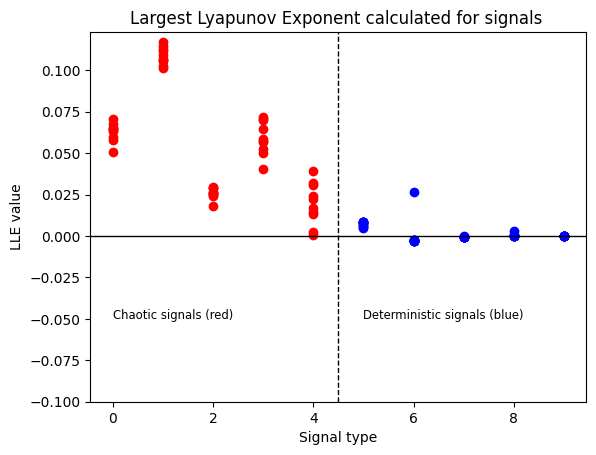

In [8]:
for i,r in enumerate(lle):
    if r.startswith('C0'): color='red'
    if r.startswith('C1'): color='blue'
    for j in range(10):
        plt.scatter(i, lle[r][j], label=f"{r}",color=color)
plt.ylim(bottom=-0.1)
plt.text(x=0,y=-0.05,s="Chaotic signals (red)",fontsize="small")# ,color="red")
plt.text(x=5,y=-0.05,s="Deterministic signals (blue)",fontsize="small")#,color="blue")
plt.axvline(x = 4.5, linewidth=1, color = 'black', label = 'threshold', ls='dashed')
plt.axhline(y = 0, linewidth=1, color = 'black', label = 'zero', ls='solid')

plt.xlabel("Signal type")
plt.ylabel("LLE value")
#plt.legend(loc="upper right")

plt.title(f"Largest Lyapunov Exponent calculated for signals ")

## Loading medmax results

In [11]:
with open('medmax100.json', 'r') as infile:
    medmax100 = json.load(infile)

In [ ]:
for r in medmax100:
    for i in range(10):
        print(r,i,medmax100[r][i],sep='\t')

C0ModelHalvorsenA513	0	0.13336080477739862
C0ModelHalvorsenA513	1	0.10624110945410414
C0ModelHalvorsenA513	2	0.07798576057802152
C0ModelHalvorsenA513	3	0.1332011559004791
C0ModelHalvorsenA513	4	0.06032384970622003
C0ModelHalvorsenA513	5	0.0981925045810748
C0ModelHalvorsenA513	6	0.07039652182723503
C0ModelHalvorsenA513	7	0.08301813791873315
C0ModelHalvorsenA513	8	0.07780814677180402
C0ModelHalvorsenA513	9	0.11985173019146264
C0ModelLorenzA51	0	0.15056089571667353
C0ModelLorenzA51	1	0.1894748756180691
C0ModelLorenzA51	2	0.15495704207647581
C0ModelLorenzA51	3	0.15919329318349715
C0ModelLorenzA51	4	0.1846263307174736
C0ModelLorenzA51	5	0.20554874266776432
C0ModelLorenzA51	6	0.1878209706951469
C0ModelLorenzA51	7	0.1713681660610328
C0ModelLorenzA51	8	0.16987525970383352
C0ModelLorenzA51	9	0.16781830696765235
C0ModelRoslerA52	0	0.05254800242670745
C0ModelRoslerA52	1	0.0700227131956329
C0ModelRoslerA52	2	0.05831163388434882
C0ModelRoslerA52	3	0.05002369685932648
C0ModelRoslerA52	4	0.0648719174

## Calculating Pearson correlation between LLE and medmax results

In [12]:
from scipy.stats import pearsonr

lle_vals = []
medmax_vals = []
for r in medmax100:
    medmax_vals.extend(medmax100[r])
    lle_vals.extend(lle[r])
print(pearsonr(medmax_vals,lle_vals))

PearsonRResult(statistic=0.8809910811993127, pvalue=1.2804122030489668e-33)
